In [ ]:
#IMPORT PACKAGES
from fbprophet import Prophet
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import itertools
import scipy
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics

In [ ]:
#IMPORT NET SALES DATASET
net_sales1=pd.read_excel("data/NET_SALES1.xlsx",keep_default_na=False)

In [ ]:
net_sales1.columns = net_sales1.columns.str.strip()
net_sales1.shape
net_sales1.info()
net_sales1.tail()

(26, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datestamp        26 non-null     datetime64[ns]
 1   Product          26 non-null     int64         
 2   Service          26 non-null     int64         
 3   Total_net_sales  26 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 960.0 bytes


,datestamp,Product,Service,Total_net_sales
21,2015-01-24,9078,2858,11936
22,2015-04-25,9326,2811,12137
23,2015-07-25,9911,2932,12843
24,2015-10-24,9844,2838,12682
25,2016-01-23,8983,2944,11927


In [ ]:
net_sales1a=net_sales1.loc[:,['Product','datestamp']]
net_sales1a.set_index('datestamp',inplace=True)
net_sales1a.tail()

,Product
datestamp,
2015-01-24,9078
2015-04-25,9326
2015-07-25,9911
2015-10-24,9844
2016-01-23,8983


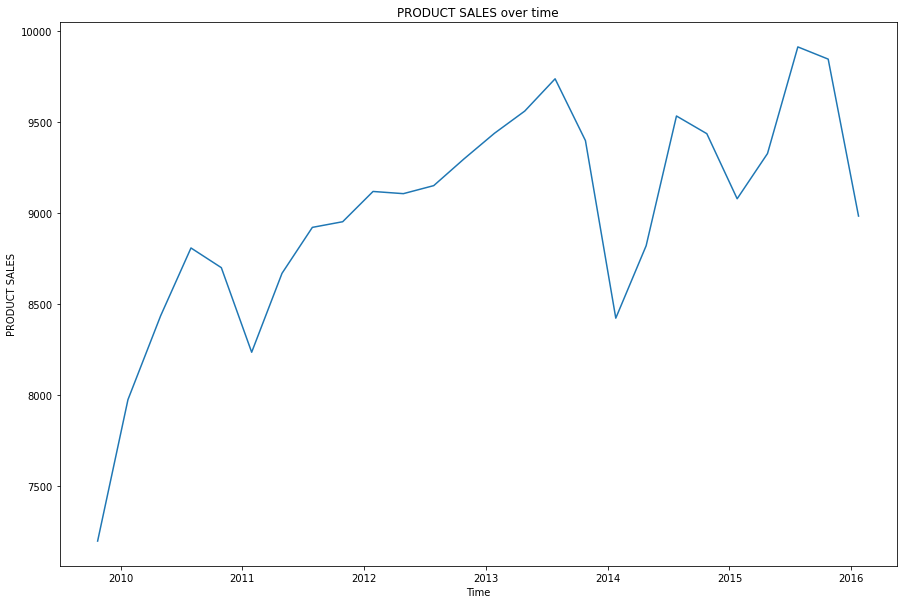

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(net_sales1a)
plt.xlabel('Time')
plt.ylabel('PRODUCT SALES')
plt.title("PRODUCT SALES over time")
plt.show;

# **PRODUCT SALES over time**

In [ ]:
net_sales1a=net_sales1.loc[:,['Service','datestamp']]
net_sales1a.set_index('datestamp',inplace=True)
net_sales1a.tail()

,Service
datestamp,
2015-01-24,2858
2015-04-25,2811
2015-07-25,2932
2015-10-24,2838
2016-01-23,2944


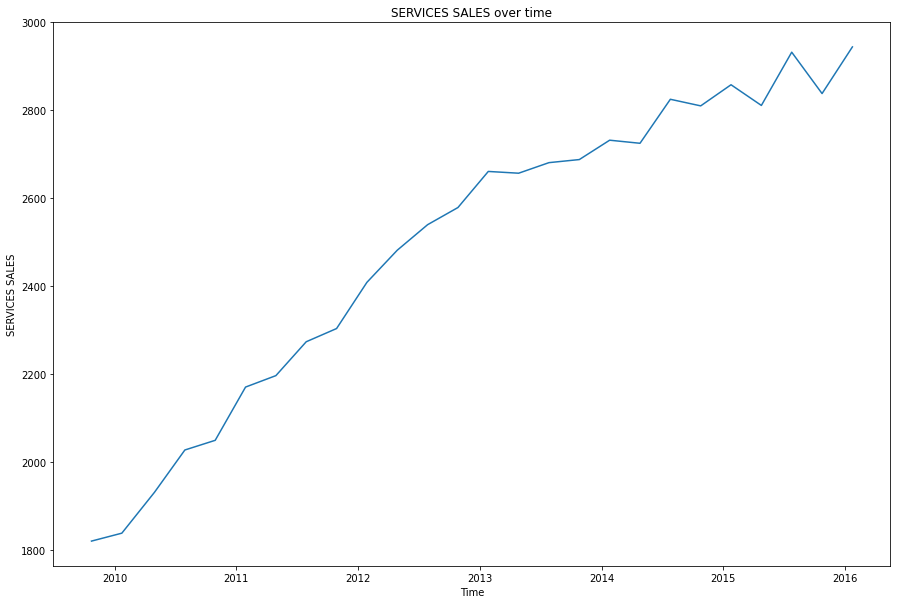

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(net_sales1a)
plt.xlabel('Time')
plt.ylabel('SERVICES SALES')
plt.title("SERVICES SALES over time")
plt.show;

# SERVICES SALES OVER **TIME**

In [ ]:
net_sales1a=net_sales1.loc[:,['Total_net_sales','datestamp']]
net_sales1a.set_index('datestamp',inplace=True)
net_sales1a.tail()

,Total_net_sales
datestamp,
2015-01-24,11936
2015-04-25,12137
2015-07-25,12843
2015-10-24,12682
2016-01-23,11927


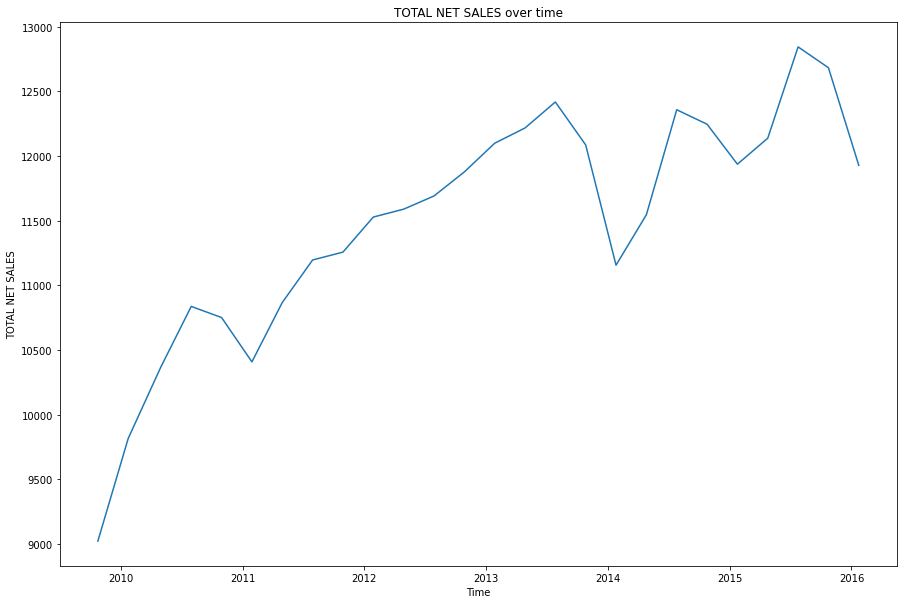

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(net_sales1a)
plt.xlabel('Time')
plt.ylabel('TOTAL NET SALES')
plt.title("TOTAL NET SALES over time")
plt.show; 

# **TOTAL NET SALES over time**

product sales shown an upward trend in 2010,2012,2013,2016
product sales shown a downward trend in 2011,2014 and 2015
Highest downward trend in product sales was visible in 2014.
Highest upward trend in product sales was visible in 2010.
services sales shown a continuous upward trend barring minor corrections here and there.Net sales over time shown downward trend wherever the product sales was down.

In [ ]:
#IMPORT COST OF SALES DATASET
cost_sales2=pd.read_excel("data/COST_SALES2.xlsx",skiprows=1)

In [ ]:
cost_sales2.columns = cost_sales2.columns.str.strip()
cost_sales2.shape
cost_sales2.info()
cost_sales2.tail()

(26, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datestamp         26 non-null     datetime64[ns]
 1   Product           26 non-null     int64         
 2   Service           26 non-null     int64         
 3   Total_cost_sales  26 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 960.0 bytes


,datestamp,Product,Service,Total_cost_sales
21,2015-01-24,3806,1040,4846
22,2015-04-25,3584,1028,4612
23,2015-07-25,4068,1042,5110
24,2015-10-24,3853,997,4850
25,2016-01-23,3480,1015,4495


In [ ]:
cost_sales2a=cost_sales2.loc[:,['Product','datestamp']]
cost_sales2a.set_index('datestamp',inplace=True)
cost_sales2a.tail()

,Product
datestamp,
2015-01-24,3806
2015-04-25,3584
2015-07-25,4068
2015-10-24,3853
2016-01-23,3480


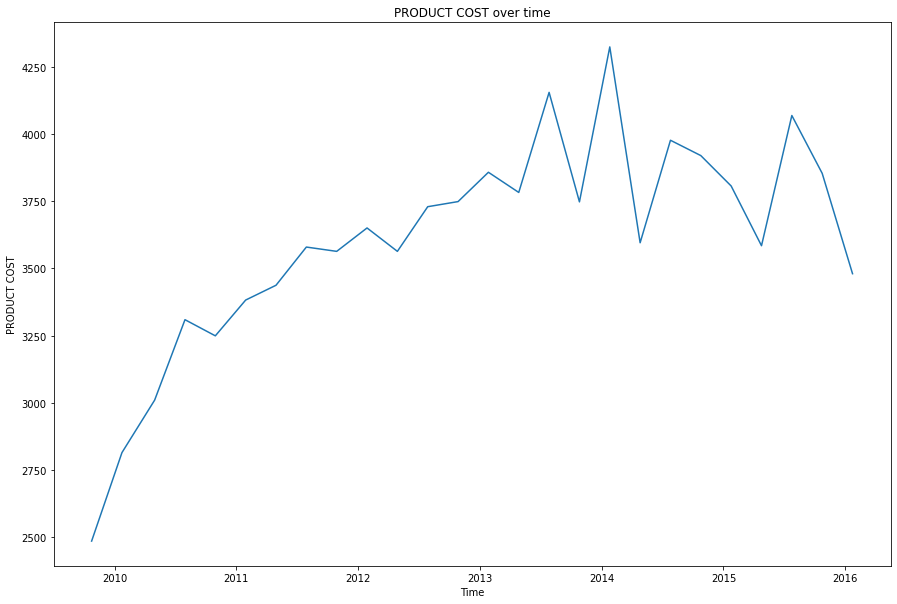

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(cost_sales2a)
plt.xlabel('Time')
plt.ylabel('PRODUCT COST')
plt.title("PRODUCT COST over time")
plt.show;

# **PRODUCT COST over time**

In [ ]:
cost_sales2a=cost_sales2.loc[:,['Service','datestamp']]
cost_sales2a.set_index('datestamp',inplace=True)
cost_sales2a.tail()

,Service
datestamp,
2015-01-24,1040
2015-04-25,1028
2015-07-25,1042
2015-10-24,997
2016-01-23,1015


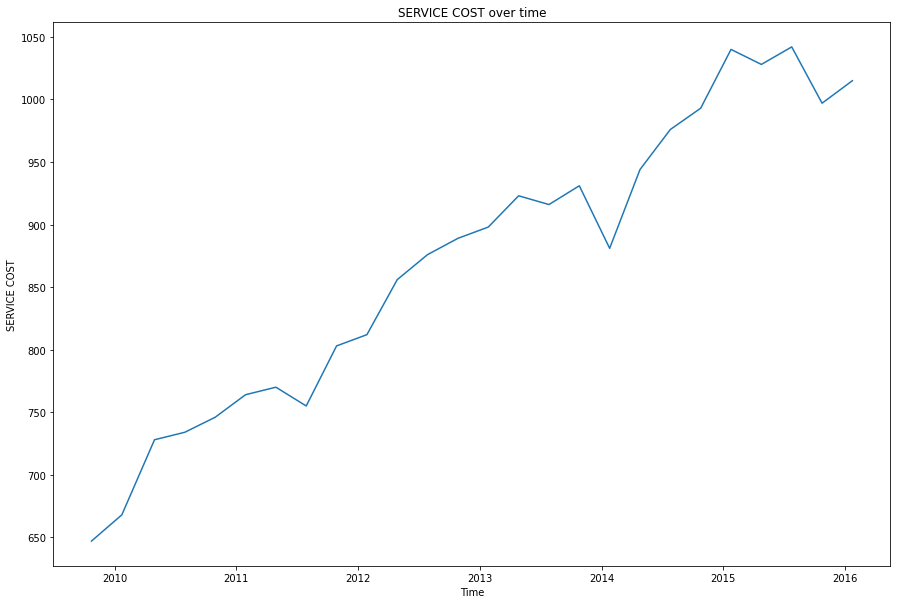

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(cost_sales2a)
plt.xlabel('Time')
plt.ylabel('SERVICE COST')
plt.title("SERVICE COST over time")
plt.show;

# **SERVICE COST over time**

In [ ]:
cost_sales2a=cost_sales2.loc[:,['Total_cost_sales','datestamp']]
cost_sales2a.set_index('datestamp',inplace=True)
cost_sales2a.tail()

,Total_cost_sales
datestamp,
2015-01-24,4846
2015-04-25,4612
2015-07-25,5110
2015-10-24,4850
2016-01-23,4495


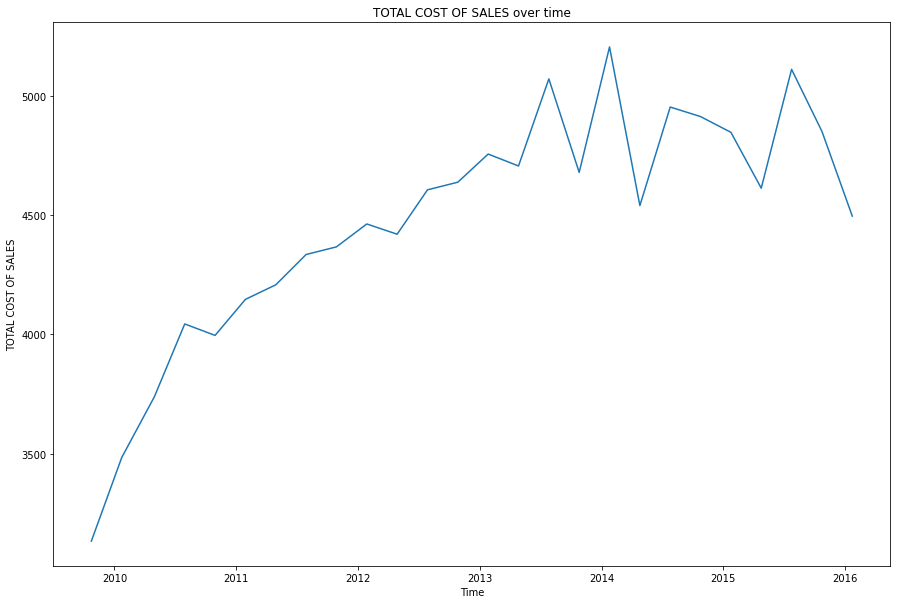

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(cost_sales2a)
plt.xlabel('Time')
plt.ylabel('TOTAL COST OF SALES')
plt.title("TOTAL COST OF SALES over time")
plt.show;

# **TOTAL COST OF SALES over time**

product cost shown an upward trend year over year and reached its peak in 2014.
product cost came down in 2015 and further went down in 2016.
services cost shown a continuous upward trend barring minor corrections here and there which was pretty disturbing.Total cost of sales over time shown downward trend wherever the product product costs came down otherwise it was ever increasing.service cost need to be controlled as it has ever been towards increasing trends.product cost was coming down in 2015 and then further improved in 2015.hence,steps must be taken to maintain the same trend thereby reducing the overall cost of sales.

In [ ]:
#IMPORT GROSS MARGIN DATASET
gross_margin3=pd.read_excel("data/GROSS_MARGIN3.xlsx")

In [ ]:
gross_margin3.columns = gross_margin3.columns.str.strip()
gross_margin3.shape
gross_margin3.info()
gross_margin3.tail()

(26, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datestamp         26 non-null     datetime64[ns]
 1   Total_net_sales   26 non-null     int64         
 2   Total_cost_sales  26 non-null     int64         
 3   GROSS_MARGIN      26 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 960.0 bytes


,datestamp,Total_net_sales,Total_cost_sales,GROSS_MARGIN
21,2015-01-24,11936,4846,7090
22,2015-04-25,12137,4612,7525
23,2015-07-25,12843,5110,7733
24,2015-10-24,12682,4850,7832
25,2016-01-23,11927,4495,7432


In [ ]:
gross_margin3a=gross_margin3.loc[:,['GROSS_MARGIN','datestamp']]
gross_margin3a.set_index('datestamp',inplace=True)
gross_margin3a.tail()

,GROSS_MARGIN
datestamp,
2015-01-24,7090
2015-04-25,7525
2015-07-25,7733
2015-10-24,7832
2016-01-23,7432


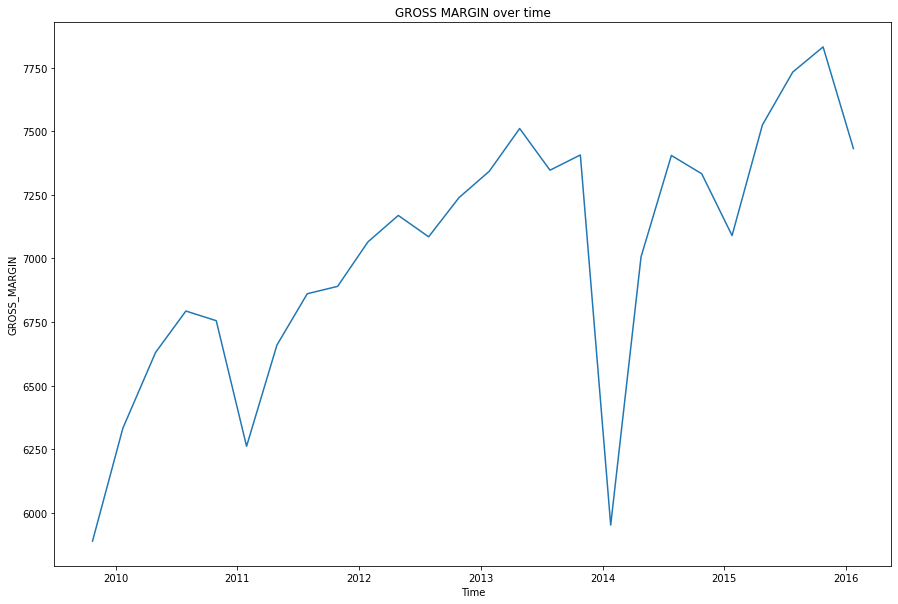

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(gross_margin3a)
plt.xlabel('Time')
plt.ylabel('GROSS_MARGIN')
plt.title("GROSS MARGIN over time")
plt.show;

# TOTAL **GROSS** MARGIN over time

Gross Margin looked to show a healthier upward trend with minor downward glitches here and there  till 2014.However as we know the product cost reached its peak in 2014 and service cost was ever increasing year on year.product sales seen the lowest downward peak in 2014.ultimately due to product sales reaching the lowest peak and product cost going up had its impact on Gross Margin.Gross Margin saw the lowest peak in 2014.however,it had shown improvements going forwards in 2015 and then  in 2016 and was able to regain much of its lost grounds by the end of 2016.

In [ ]:
#IMPORT oOPERATING EXPENSES DATASET
opr_expenses4=pd.read_excel("data/OPERATING_EXPENSES4.xlsx")

In [ ]:
opr_expenses4.columns = opr_expenses4.columns.str.strip()
opr_expenses4.shape
opr_expenses4.info()
opr_expenses4.tail()

(26, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   datestamp                      26 non-null     datetime64[ns]
 1   Research_development           26 non-null     int64         
 2   Sales_marketing                26 non-null     int64         
 3   General_administrative         26 non-null     int64         
 4   Amortization_purchased_assets  26 non-null     int64         
 5   Restructuring                  20 non-null     object        
 6   Total_operating_expenses       26 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.5+ KB


,datestamp,Research_development,Sales_marketing,General_administrative,Amortization_purchased_assets,Restructuring,Total_operating_expenses
21,2015-01-24,1529,2308,490,72,69,4468
22,2015-04-25,1547,2449,510,70,24,4600
23,2015-07-25,1548,2549,536,146,73,4852
24,2015-10-24,1560,2443,539,69,142,4753
25,2016-01-23,1509,2286,176,71,96,4138


In [ ]:
operating_expenses=opr_expenses4.loc[:,['Research_development','datestamp']]
operating_expenses.set_index('datestamp',inplace=True)
operating_expenses.tail()

,Research_development
datestamp,
2015-01-24,1529
2015-04-25,1547
2015-07-25,1548
2015-10-24,1560
2016-01-23,1509


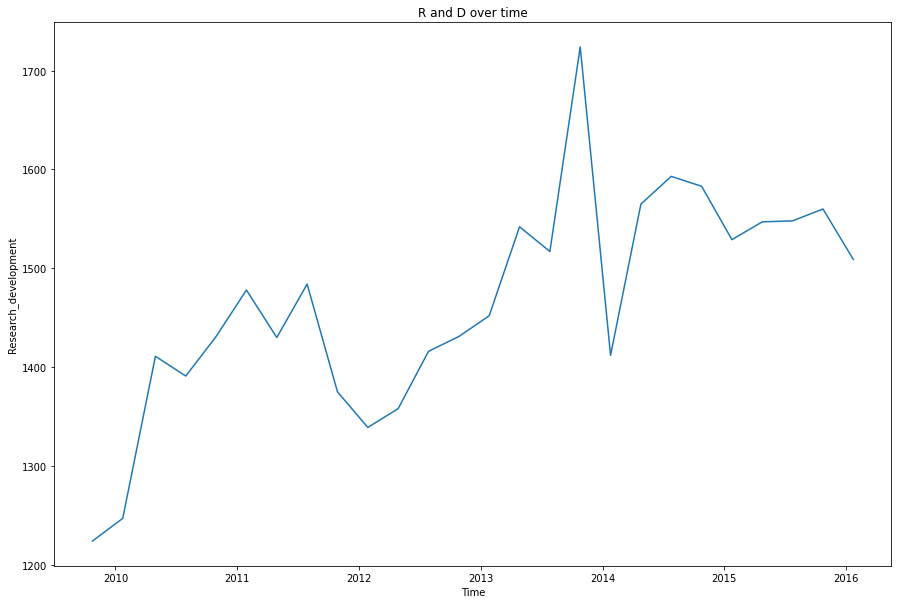

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(operating_expenses)
plt.xlabel('Time')
plt.ylabel('Research_development')
plt.title("R and D over time")
plt.show;

# **R and D COST over time**

In [ ]:
operating_expenses=opr_expenses4.loc[:,['Sales_marketing','datestamp']]
operating_expenses.set_index('datestamp',inplace=True)
operating_expenses.tail()

,Sales_marketing
datestamp,
2015-01-24,2308
2015-04-25,2449
2015-07-25,2549
2015-10-24,2443
2016-01-23,2286


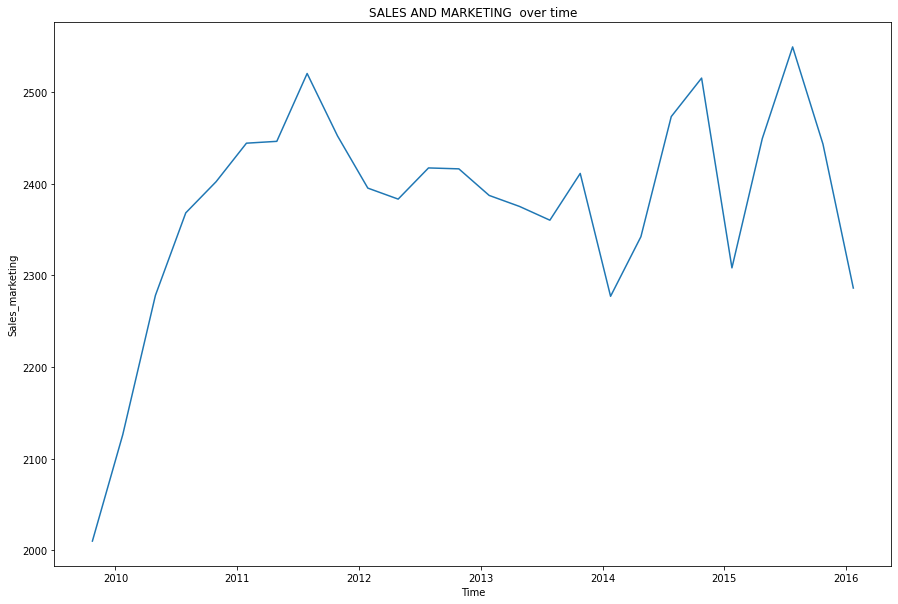

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(operating_expenses)
plt.xlabel('Time')
plt.ylabel('Sales_marketing')
plt.title("SALES AND MARKETING  over time")
plt.show;

# **SALES AND MARKETING  COST over time**

In [ ]:
operating_expenses=opr_expenses4.loc[:,['Total_operating_expenses','datestamp']]
operating_expenses.set_index('datestamp',inplace=True)
operating_expenses.tail()

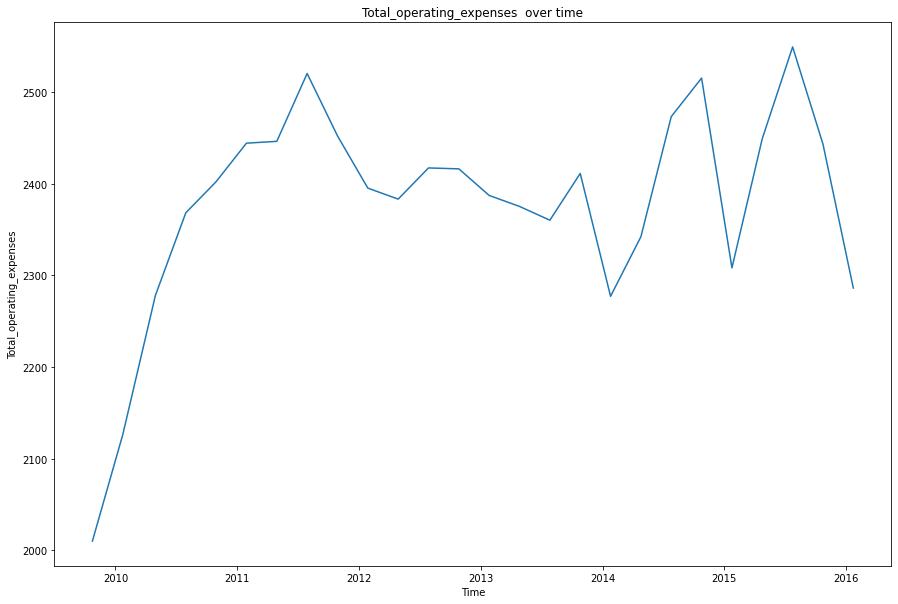

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(operating_expenses)
plt.xlabel('Time')
plt.ylabel('Total_operating_expenses')
plt.title("Total_operating_expenses  over time")
plt.show;

# **TOTAL OPERATING EXPENSES over TIME**


The company spent considerable money in R and D till 2014.
The R & D expenses dipped down to lowest tip in 2014 and then company realized its mistakes and thereby increased R&D expenses going forwards in 2015 and then again in 2016.kindly note that company gross margin had hit the lowest bottom and reducing expenses in R&D might had been one of the factors.
sales and marketing cost was going up till 2011.however we couln't see any upward or downward trend going further  2011 and it almost seemed to plateau from 2011 up till 2016 which looked to be quite positive.
Total operating cost was in an upward trend till 2011 and then it remained around the same zone going forward from 2011 up till 2016.This was overall a good sign. However,the company is advised to keep maintaining the same R&D initiatives year on year as that would only help the company to innovate and prosper further more in coming years.

In [ ]:
#IMPORT OPERATING INCOME DATASET
opr_income5=pd.read_excel("data/OPERATING_INCOME5.xlsx")

In [ ]:
opr_income5=opr_income5.iloc[:26,:]
opr_income5.columns = opr_income5.columns.str.strip()
opr_income5['OPERATING_INCOME']=pd.to_numeric(opr_income5['OPERATING_INCOME'],errors='coerce')
opr_income5['Interest_income']=pd.to_numeric(opr_income5['Interest_income'],errors='coerce')
opr_income5['Interest_expense']=pd.to_numeric(opr_income5['Interest_expense'],errors='coerce')
opr_income5['Other_income']=pd.to_numeric(opr_income5['Other_income'],errors='coerce')
opr_income5['net_other_income']=pd.to_numeric(opr_income5['net_other_income'],errors='coerce')
opr_income5.columns = opr_income5.columns.str.strip()
opr_income5.shape
opr_income5.info()
opr_income5.tail()

(26, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datestamp         26 non-null     datetime64[ns]
 1   OPERATING_INCOME  26 non-null     float64       
 2   Interest_income   26 non-null     int64         
 3   Interest_expense  26 non-null     int64         
 4   Other_income      26 non-null     int64         
 5   net_other_income  26 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.3 KB


,datestamp,OPERATING_INCOME,Interest_income,Interest_expense,Other_income,net_other_income
21,2015-01-24,2622.0,189,-139,201,251
22,2015-04-25,2925.0,190,-139,59,110
23,2015-07-25,2881.0,211,-149,-10,52
24,2015-10-24,3079.0,225,-159,-8,58
25,2016-01-23,3294.0,237,-162,-63,12


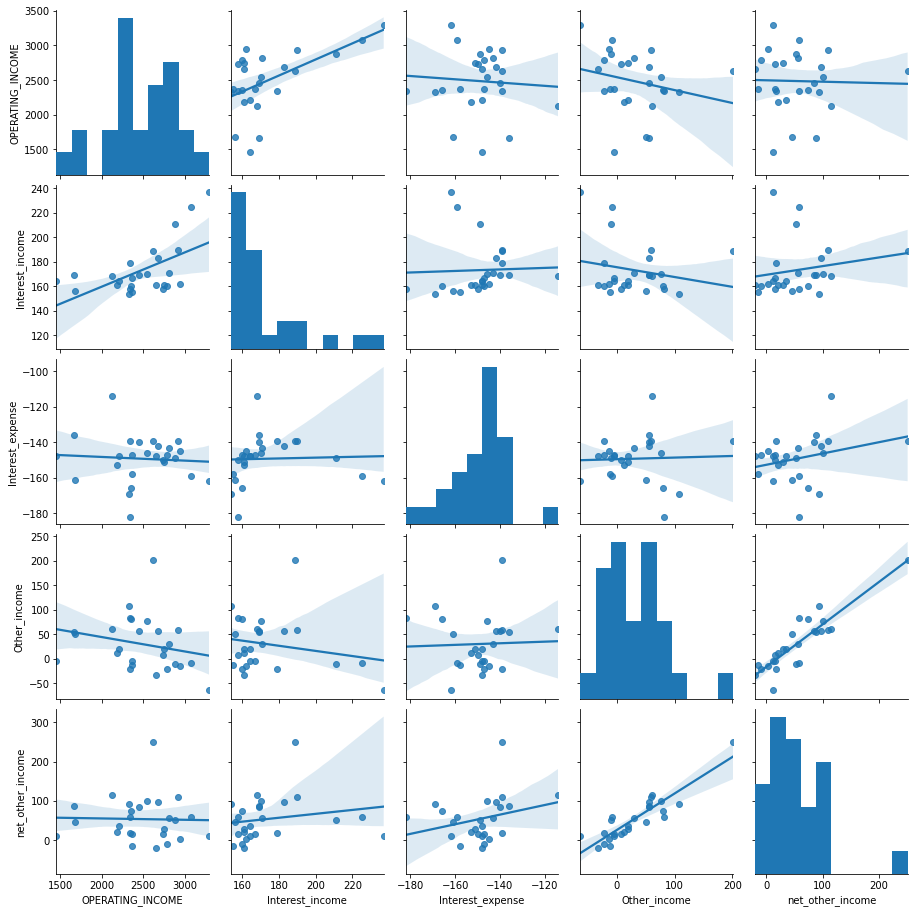

In [ ]:
sns.pairplot(opr_income5,kind="reg")
plt.show()

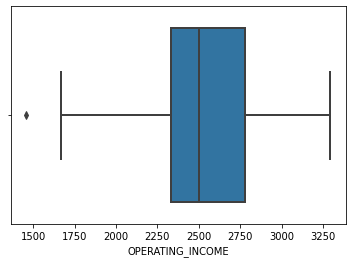

In [ ]:
#BOX PLOT
sns.boxplot(x='OPERATING_INCOME',data=opr_income5,linewidth=2)
plt.show()

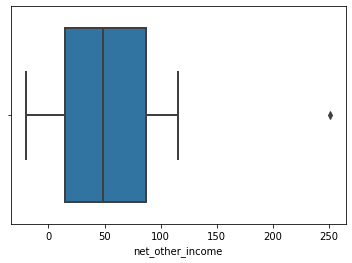

In [ ]:
#BOX PLOT
sns.boxplot(x='net_other_income',data=opr_income5,linewidth=2)
plt.show()

In [ ]:
operating_income=opr_income5.loc[:,['OPERATING_INCOME','datestamp']]
operating_income.set_index('datestamp',inplace=True)
operating_income.tail()

,OPERATING_INCOME
datestamp,
2015-01-24,2622.0
2015-04-25,2925.0
2015-07-25,2881.0
2015-10-24,3079.0
2016-01-23,3294.0


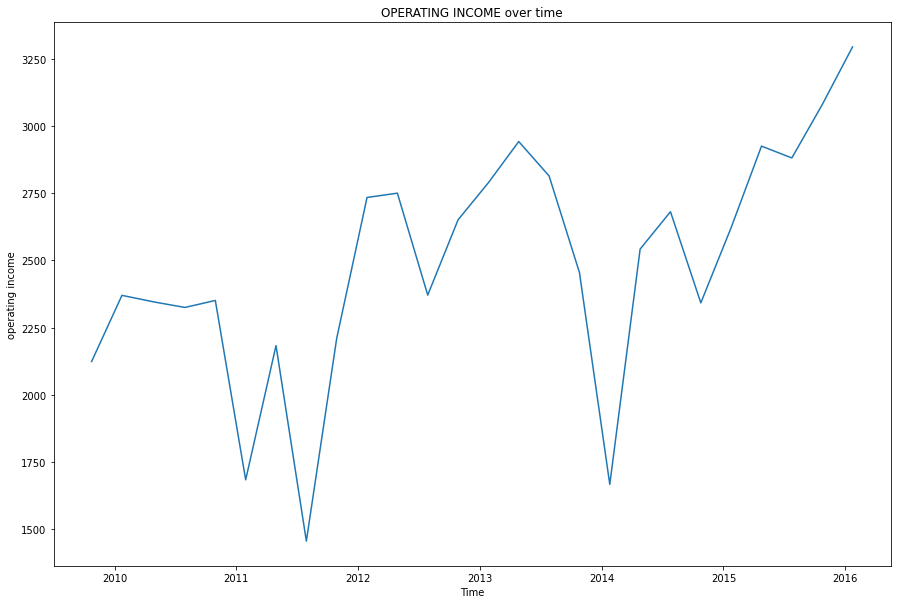

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(operating_income)
plt.xlabel('Time')
plt.ylabel('operating income')
plt.title("OPERATING INCOME over time")
plt.show;

# **OPERATING INCOME over time**

In [ ]:
decomposition=seasonal_decompose(operating_income,model='multiplicative',freq=4,extrapolate_trend='freq')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

<Figure size 1440x720 with 0 Axes>

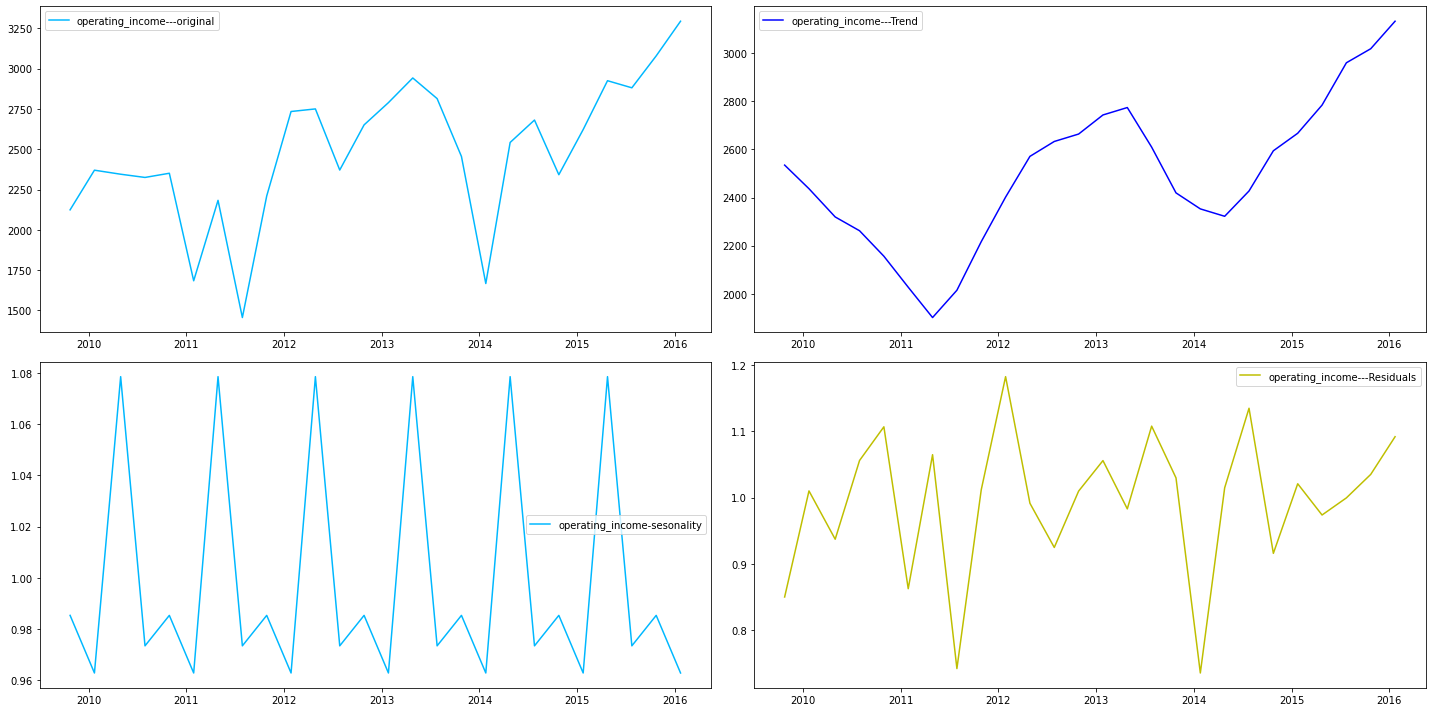

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(operating_income,color='#00b8ff',label='operating_income---original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,'b',label='operating_income---Trend')
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='operating_income-sesonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual,'y',label='operating_income---Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# **OPERATING INCOME ORIGINAL GRAPH+TREND+SEASONALITY+NOISE**

operating income shown a continuous upward trend since 2014 onwards till 2016.
The company had seen its operating income going down from 2010 to 2012 and then fluctuating quite a lot from 2012 till 2014.Hence,company must try to find reasons and learn its lesson from the downfall that happened in 2010-2012 and then sharp fluctuations which it had seen from 2012 till 2014.

In [ ]:
#IMPORT NET INCOME DATASET
net_income6=pd.read_excel("data/NET_INCOME6.xlsx",keep_default_na=False)

In [ ]:
net_income6=net_income6.iloc[:26,:]
net_income6.columns = net_income6.columns.str.strip()
net_income6['Total_operating_expenses']=pd.to_numeric(net_income6['Total_operating_expenses'],errors='coerce')
net_income6['OPERATING_INCOME']=pd.to_numeric(net_income6['OPERATING_INCOME'],errors='coerce')
net_income6['other_income']=pd.to_numeric(net_income6['other_income'],errors='coerce')
net_income6['INCOME_BEFORE_TAXES']=pd.to_numeric(net_income6['INCOME_BEFORE_TAXES'],errors='coerce')
net_income6['income_taxes']=pd.to_numeric(net_income6['income_taxes'],errors='coerce')
net_income6['NET_INCOME']=pd.to_numeric(net_income6['NET_INCOME'],errors='coerce')

In [ ]:
net_income6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   datestamp                 26 non-null     datetime64[ns]
 1   Total_operating_expenses  26 non-null     int64         
 2   OPERATING_INCOME          26 non-null     int64         
 3   other_income              26 non-null     int64         
 4   INCOME_BEFORE_TAXES       26 non-null     int64         
 5   income_taxes              26 non-null     int64         
 6   NET_INCOME                26 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 1.5 KB


In [ ]:
net_income6.shape
net_income6.tail()

(26, 7)

,datestamp,Total_operating_expenses,OPERATING_INCOME,other_income,INCOME_BEFORE_TAXES,income_taxes,NET_INCOME
21,2015-01-24,4468,2622,251,2873,476,2397
22,2015-04-25,4600,2925,110,3035,598,2437
23,2015-07-25,4852,2881,52,2933,614,2319
24,2015-10-24,4753,3079,58,3137,707,2430
25,2016-01-23,4138,3294,12,3306,159,3147


In [ ]:
net_income6['year'] = pd.DatetimeIndex(net_income6['datestamp']).year
net_income6['month'] = pd.DatetimeIndex(net_income6['datestamp']).month
#net_sales1.rename(columns={'Total net sales':'net_sales'}, inplace=True)
net_income6.tail()

,datestamp,Total_operating_expenses,OPERATING_INCOME,other_income,INCOME_BEFORE_TAXES,income_taxes,NET_INCOME,year,month
21,2015-01-24,4468,2622,251,2873,476,2397,2015,1
22,2015-04-25,4600,2925,110,3035,598,2437,2015,4
23,2015-07-25,4852,2881,52,2933,614,2319,2015,7
24,2015-10-24,4753,3079,58,3137,707,2430,2015,10
25,2016-01-23,4138,3294,12,3306,159,3147,2016,1


In [ ]:
net_income6.describe()

,Total_operating_expenses,OPERATING_INCOME,other_income,INCOME_BEFORE_TAXES,income_taxes,NET_INCOME,year,month
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,4536.730769,2484.115385,53.769231,2537.884615,434.346154,2103.538462,2012.500000,5.538462
std,327.498343,436.571948,56.807258,438.761742,213.060356,439.284803,1.944222,3.512615
min,3764.000000,1456.000000,-20.000000,1467.000000,-363.000000,1232.000000,2009.000000,1.000000
25%,4407.750000,2329.250000,15.000000,2356.250000,410.000000,1834.250000,2011.000000,1.750000
50%,4543.500000,2498.500000,49.000000,2585.500000,479.500000,2128.500000,2012.500000,6.000000
75%,4705.500000,2779.250000,87.250000,2848.250000,542.750000,2306.750000,2014.000000,9.250000
max,5405.000000,3294.000000,251.000000,3306.000000,707.000000,3147.000000,2016.000000,10.000000


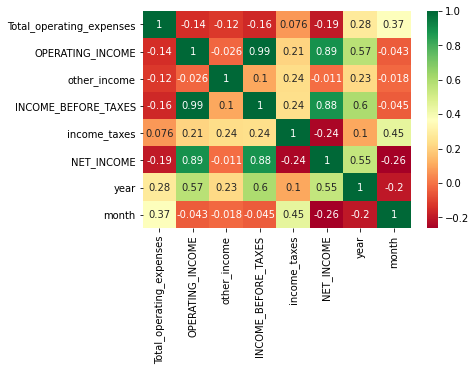

In [ ]:
correlation=net_income6.corr()
sns.heatmap(correlation,cmap="RdYlGn",annot=True)
plt.show()

In [ ]:
table = pd.pivot_table(net_income6, values=['Total_operating_expenses','INCOME_BEFORE_TAXES','NET_INCOME'], index=['month'],columns=['year'],fill_value=-1)
table

INCOME_BEFORE_TAXES                          ... Total_operating_expenses                        
year                 2009  2010  2011  2012  2013  ...                     2012  2013  2014  2015  2016
month                                              ...                                                 
1                      -1  2355  1730  2749  2780  ...                     4331  4554  4284  4468  4138
4                      -1    -1  2203  2779  2945  ...                     4419  4569  4464  4600    -1
5                      -1  2403    -1    -1    -1  ...                       -1    -1    -1    -1    -1
7                      -1  2418  1467  2386  2871  ...                     4714  4533  4724  4852    -1
10                   2239  2425  2245  2631  2540  ...                     4588  4952  4991  4753    -1

[5 rows x 24 columns]

In [ ]:
plt.figure(figsize=(10,10))
cmap=sns.color_palette(['lightyellow', 'yellow','orange','lightgreen','green','red'])
cmap=sns.color_palette(n_colors=16)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

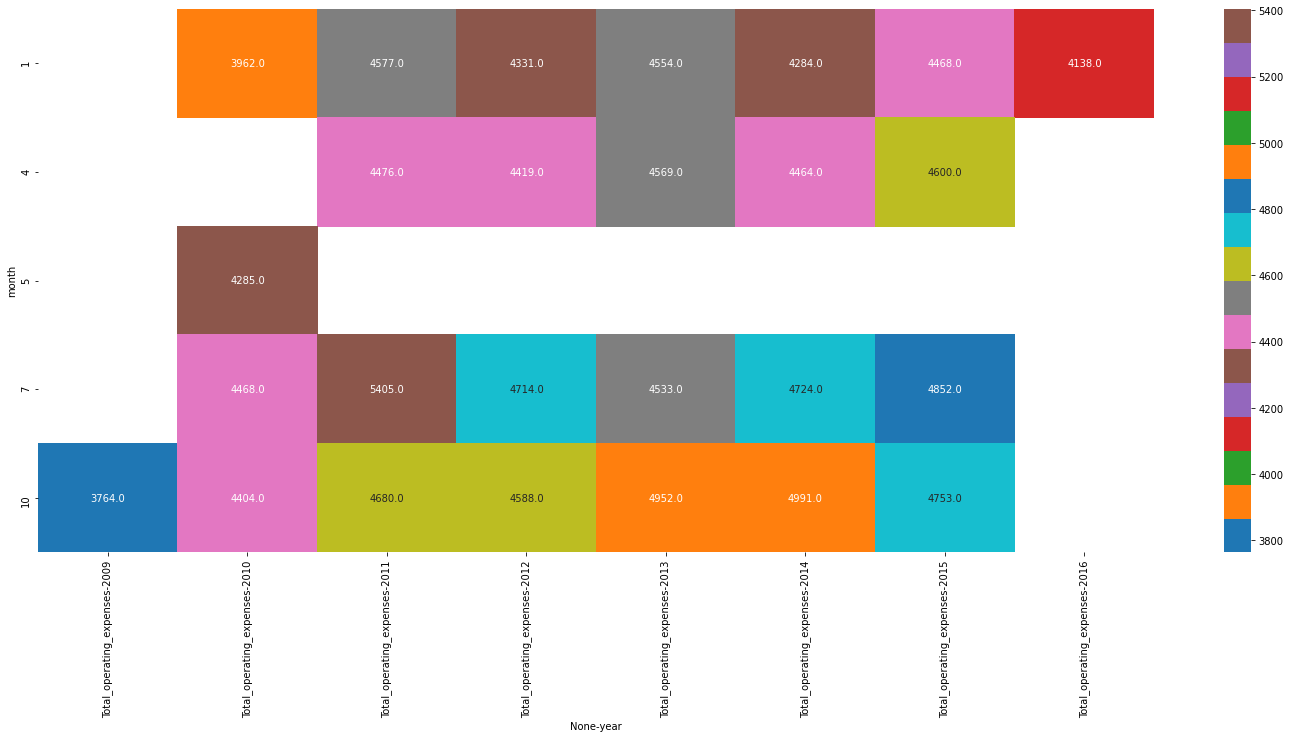

In [ ]:
plt.figure(figsize=(25,10))
heatmap_data = pd.pivot_table(net_income6, values=['Total_operating_expenses'], index=['month'], columns='year')
sns.heatmap(heatmap_data,cmap=cmap,annot=True,fmt='.1f')

<Figure size 1800x720 with 0 Axes>

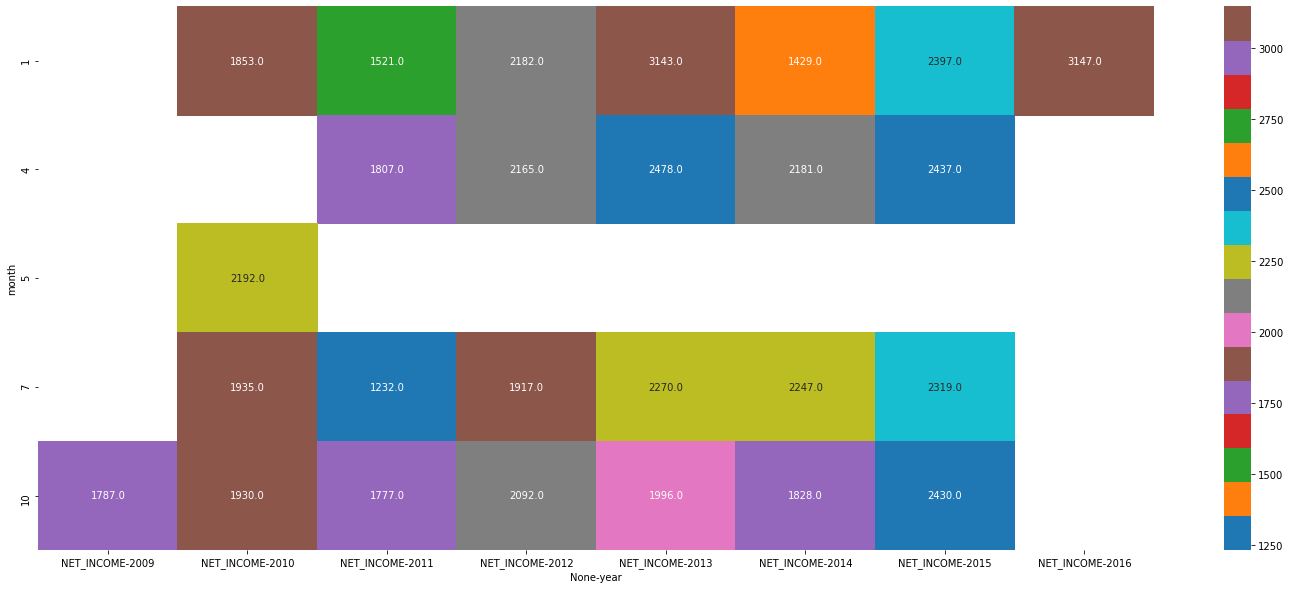

In [ ]:
plt.figure(figsize=(25,10))
heatmap_data = pd.pivot_table(net_income6, values=['NET_INCOME'], index=['month'], columns='year')
sns.heatmap(heatmap_data,cmap=cmap,annot=True,fmt='.1f')

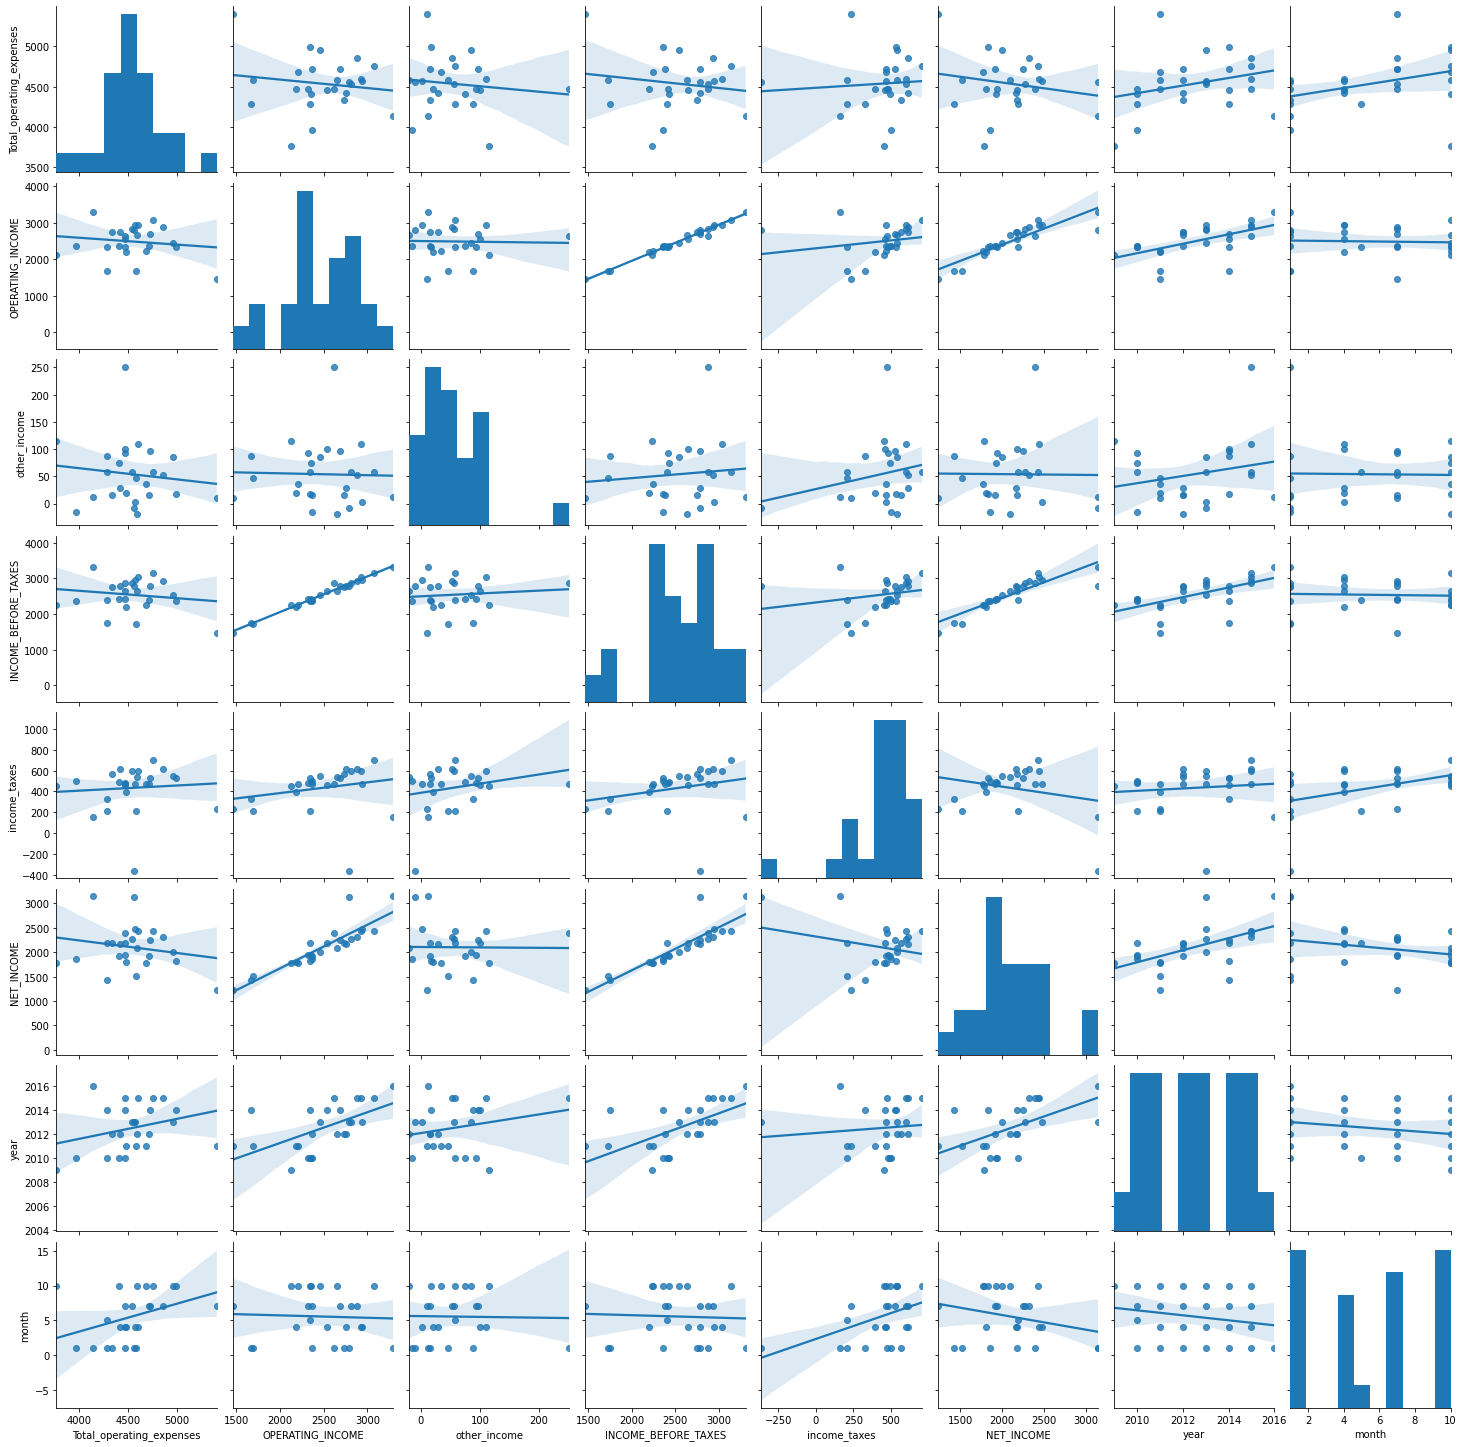

In [ ]:
sns.pairplot(net_income6,kind="reg")
plt.show()

In [ ]:
net_income6a=net_income6.loc[:,('datestamp','Total_operating_expenses','INCOME_BEFORE_TAXES','NET_INCOME')]

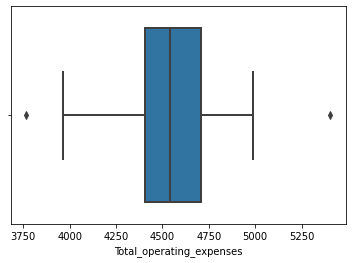

In [ ]:
#BOX PLOT
sns.boxplot(x='Total_operating_expenses',data=net_income6a,linewidth=2)
plt.show()

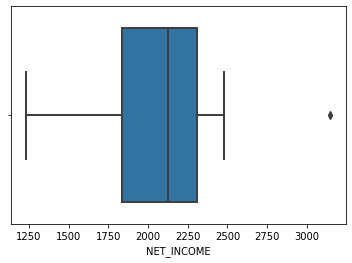

In [ ]:
#BOX PLOT
sns.boxplot(x='NET_INCOME',data=net_income6a,linewidth=2)
plt.show()

In [ ]:
net_income6a.set_index('datestamp',inplace=True)
net_income6a.tail()

,Total_operating_expenses,INCOME_BEFORE_TAXES,NET_INCOME
datestamp,,,
2015-01-24,4468,2873,2397
2015-04-25,4600,3035,2437
2015-07-25,4852,2933,2319
2015-10-24,4753,3137,2430
2016-01-23,4138,3306,3147


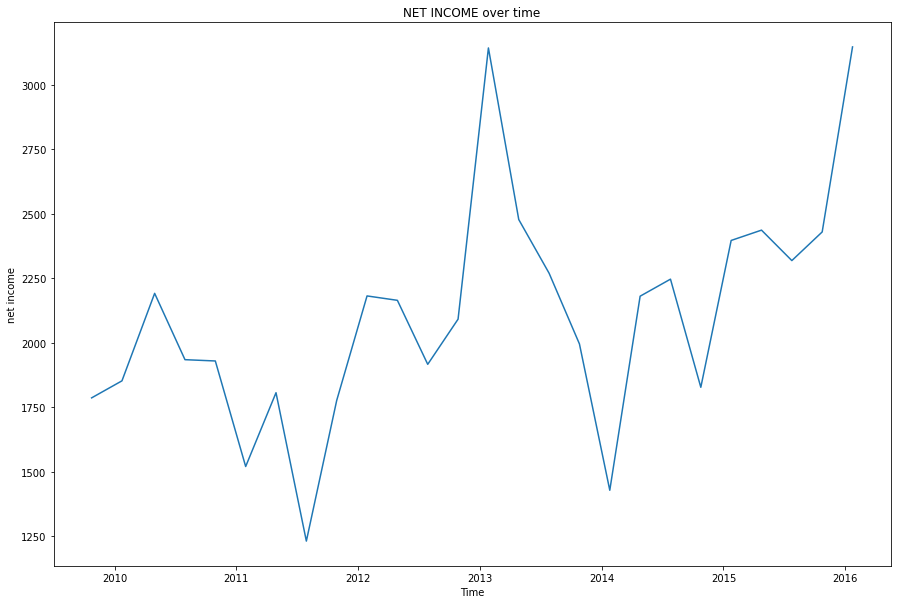

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(net_income6a['NET_INCOME'])
plt.xlabel('Time')
plt.ylabel('net income')
plt.title("NET INCOME over time")
plt.show;

# **NET INCOME over time**

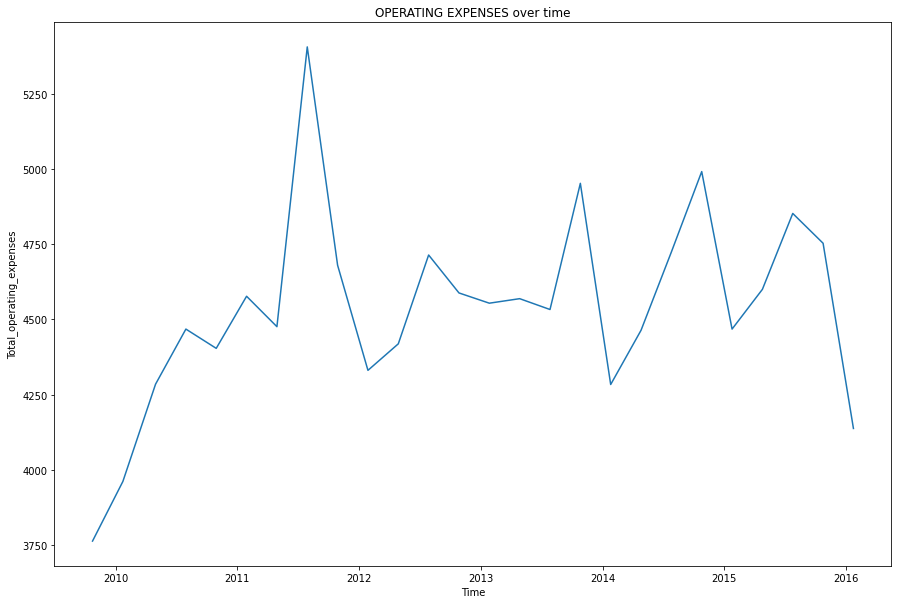

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(net_income6a['Total_operating_expenses'])
plt.xlabel('Time')
plt.ylabel('Total_operating_expenses')
plt.title("OPERATING EXPENSES over time")
plt.show;

# **OPERATING EXPENSES over time**

---



In [ ]:
operating_expenses=net_income6a.loc[:,['Total_operating_expenses']]
decomposition=seasonal_decompose(operating_expenses,model='multiplicative',freq=4,extrapolate_trend='freq')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

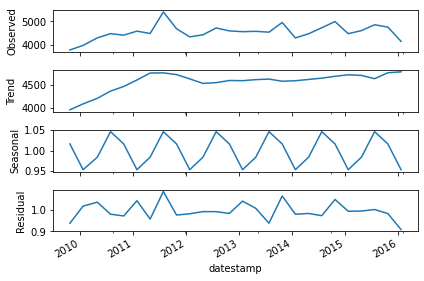

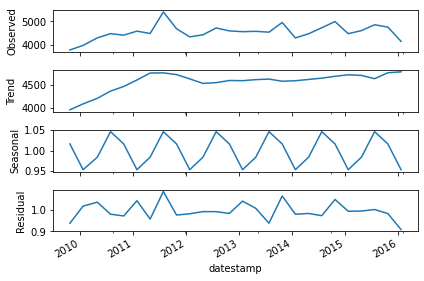

In [ ]:
decomposition.plot()

<Figure size 1440x720 with 0 Axes>

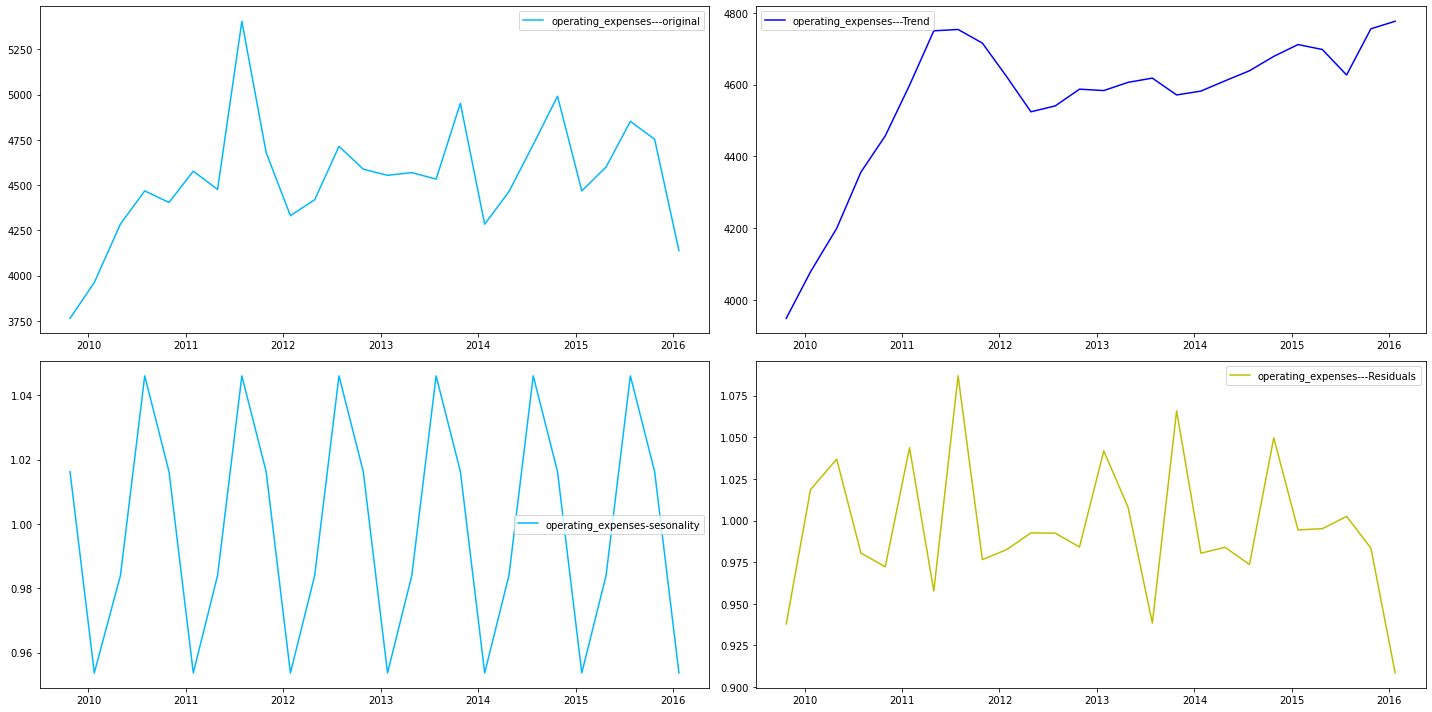

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(operating_expenses,color='#00b8ff',label='operating_expenses---original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,'b',label='operating_expenses---Trend')
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='operating_expenses-sesonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual,'y',label='operating_expenses---Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# **OPERATING EXPENSES ORIGINAL GRAPH+TREND+SEASONITY+NOISE**

In [ ]:
NET_INCOME=net_income6a.loc[:,['NET_INCOME']]
decomposition=seasonal_decompose(NET_INCOME,model='multiplicative',freq=4,extrapolate_trend='freq')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

<Figure size 1440x720 with 0 Axes>

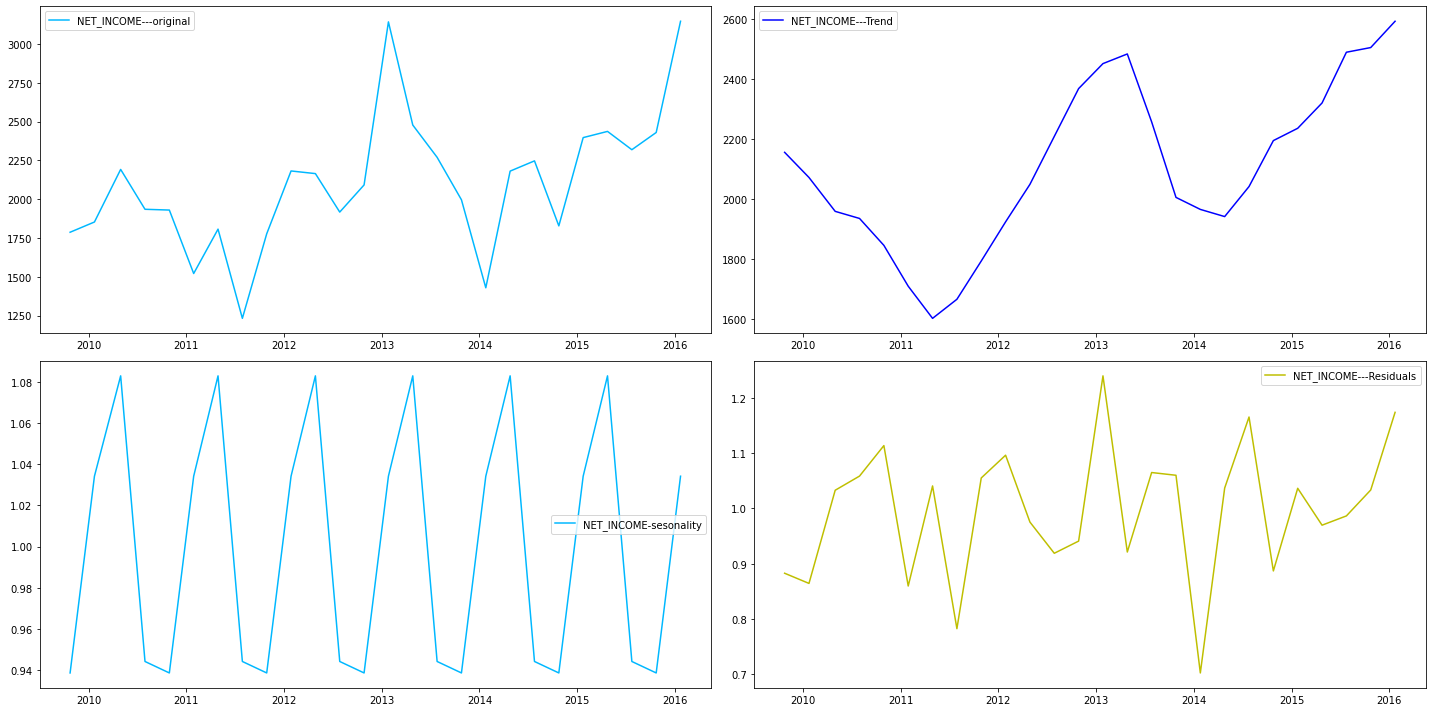

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(NET_INCOME,color='#00b8ff',label='NET_INCOME---original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,'b',label='NET_INCOME---Trend')
plt.legend(loc='best')
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='NET_INCOME-sesonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual,'y',label='NET_INCOME---Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# **NET INCOME ORIGINAL GRAPH+TREND+SEASONALITY+NOISE**

Net Income shown a continuous upward trend since 2014 onwards till 2016.
The company had seen its Net Income going down from 2010 to 2012 and then fluctuating quite a lot from 2012 till 2014.
Hence,company must try to find reasons and learn its lesson from the downfall that happened in 2010-2012 and then sharp fluctuations which it had seen from 2012 till 2014.

In [ ]:
!jupyter nbconvert ANALYSING_DATA__CISCO_DATASET.ipynb

[NbConvertApp] Converting notebook ANALYSING_DATA__CISCO_DATASET.ipynb to html
[NbConvertApp] Writing 2102381 bytes to ANALYSING_DATA__CISCO_DATASET.html
